### Step 1: Import Necessary Libraries

In [4]:
!pip install pandas numpy seaborn matplotlib scikit-learn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Step 2: Load and Explore the Data

In [6]:
# Load data
data = pd.read_csv('my_data.csv')

# Check the first few rows
data.head()

# Summary statistics
data.describe()

,Population,GDP per capita,Consumer spending,GLA per 1000 capita
count,51.000000,51.000000,51.000000,51.000000
mean,45.411765,43451.176471,16267.313725,294.411765
std,73.499708,34984.528716,10491.060157,402.367652
min,1.000000,1468.000000,871.000000,15.000000
25%,6.000000,6518.000000,4545.500000,77.000000
50%,18.000000,43269.000000,19324.000000,163.000000
75%,49.000000,60826.000000,22928.000000,304.000000
max,345.000000,142214.000000,43931.000000,2183.000000


### Step 3: Exploratory Data Analysis (EDA)

3.1 Visualize the Data Distributions

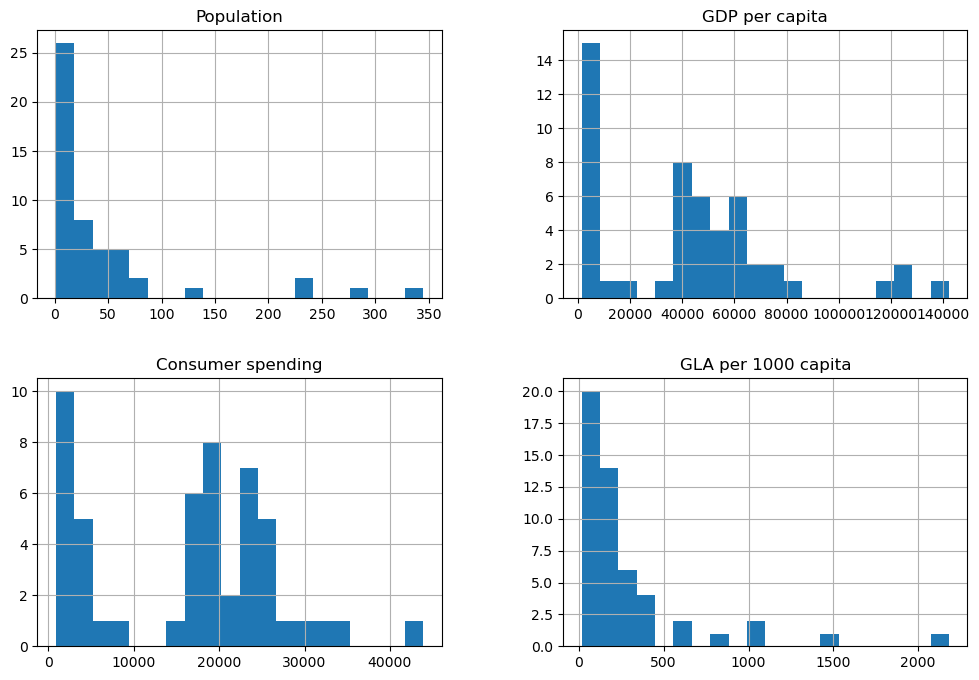

In [7]:
# Histograms for all numeric features
data.hist(bins=20, figsize=(12, 8))
plt.show()

3.2 Check Correlations

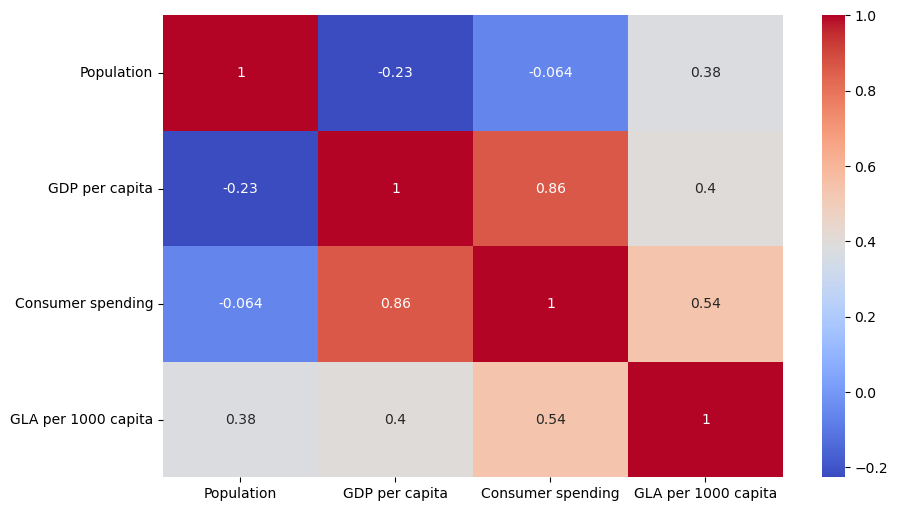

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

3.3 Scatter Plot of Key Features vs Target

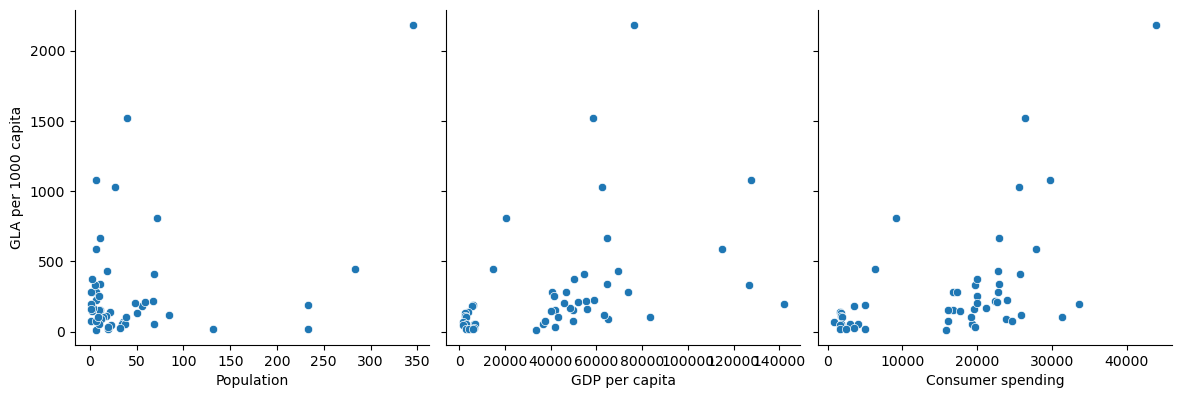

In [9]:
sns.pairplot(data, x_vars=['Population', 'GDP per capita', 'Consumer spending'], y_vars='GLA per 1000 capita', height=4)
plt.show()

### Step 4: Data Preprocessing

4.1 Handle Missing Values

In [11]:
# Fill missing values only in numeric columns
data.fillna(data.select_dtypes(include=[np.number]).mean(), inplace=True)

4.2 Split Data into Features and Target

In [20]:
X = data.drop(columns=['GLA per 1000 capita', 'City', 'Country', 'GLA Year', 'GLA Source'])  # Drop the target column
y = data['GLA per 1000 capita']

### Step 5: Split the Data into Training and Testing Sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 6: Train the Model

6.1 Initialize and Train the Model

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

6.2 Cross-Validate the Model

In [23]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", np.sqrt(-cv_scores).mean())

Cross-validated RMSE: 348.7133147635426


### Step 7: Evaluate the Model

In [24]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 137073.52348397154
Mean Absolute Error: 252.32113390945875
R-squared: 0.16161714668762273


### Step 8: Analyze Results

8.1 Plot Predicted vs Actual

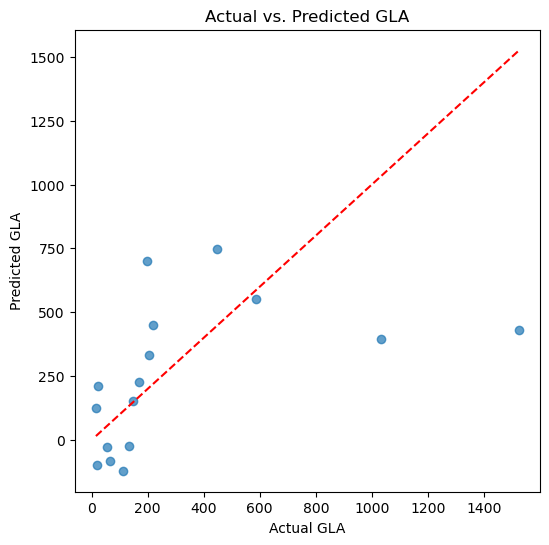

In [25]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual GLA')
plt.ylabel('Predicted GLA')
plt.title('Actual vs. Predicted GLA')
plt.show()

8.2 Residual Plot

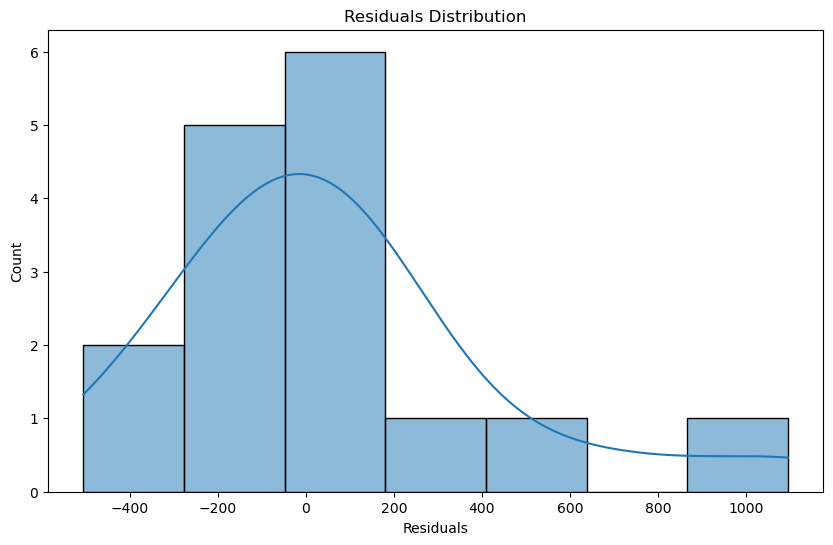

In [26]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

### Step 9: Try Other Models

In [29]:
# Ridge Regression
ridge = Ridge(alpha=1.0, solver="lsqr")
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge R-squared:", r2_score(y_test, ridge_pred))

# Decision Tree
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print("Decision Tree R-squared:", r2_score(y_test, tree_pred))

Ridge R-squared: 0.16161933288272057
Decision Tree R-squared: -0.1948744375654754


### Step 10: Save the Model

In [30]:
import joblib
joblib.dump(model, 'GLA_prediction_model.pkl')

['GLA_prediction_model.pkl']